In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_excel("train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10683, 11)

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## DATA PREPROCESSING

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [ ]:
#convert duration of hours into minutes
df['Duration'] = df['Duration'].str.replace('h', ':').str.replace('m', '')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2: 50,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7: 25,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19:,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5: 25,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4: 45,1 stop,No info,13302


In [ ]:
df['Duration'] = df['Duration'].str.replace(':', '*60').str.replace(' ', '+').apply(eval)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [ ]:
df["Journey_day"] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df["Arr_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arr_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
g = {'non-stop' : 0, '2 stops' : 2, '1 stop' : 1, '3 stops' : 3, '4 stops' : 4}

In [ ]:
df['Total_Stops'] = df['Total_Stops'].map(g)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


## CORRELATION

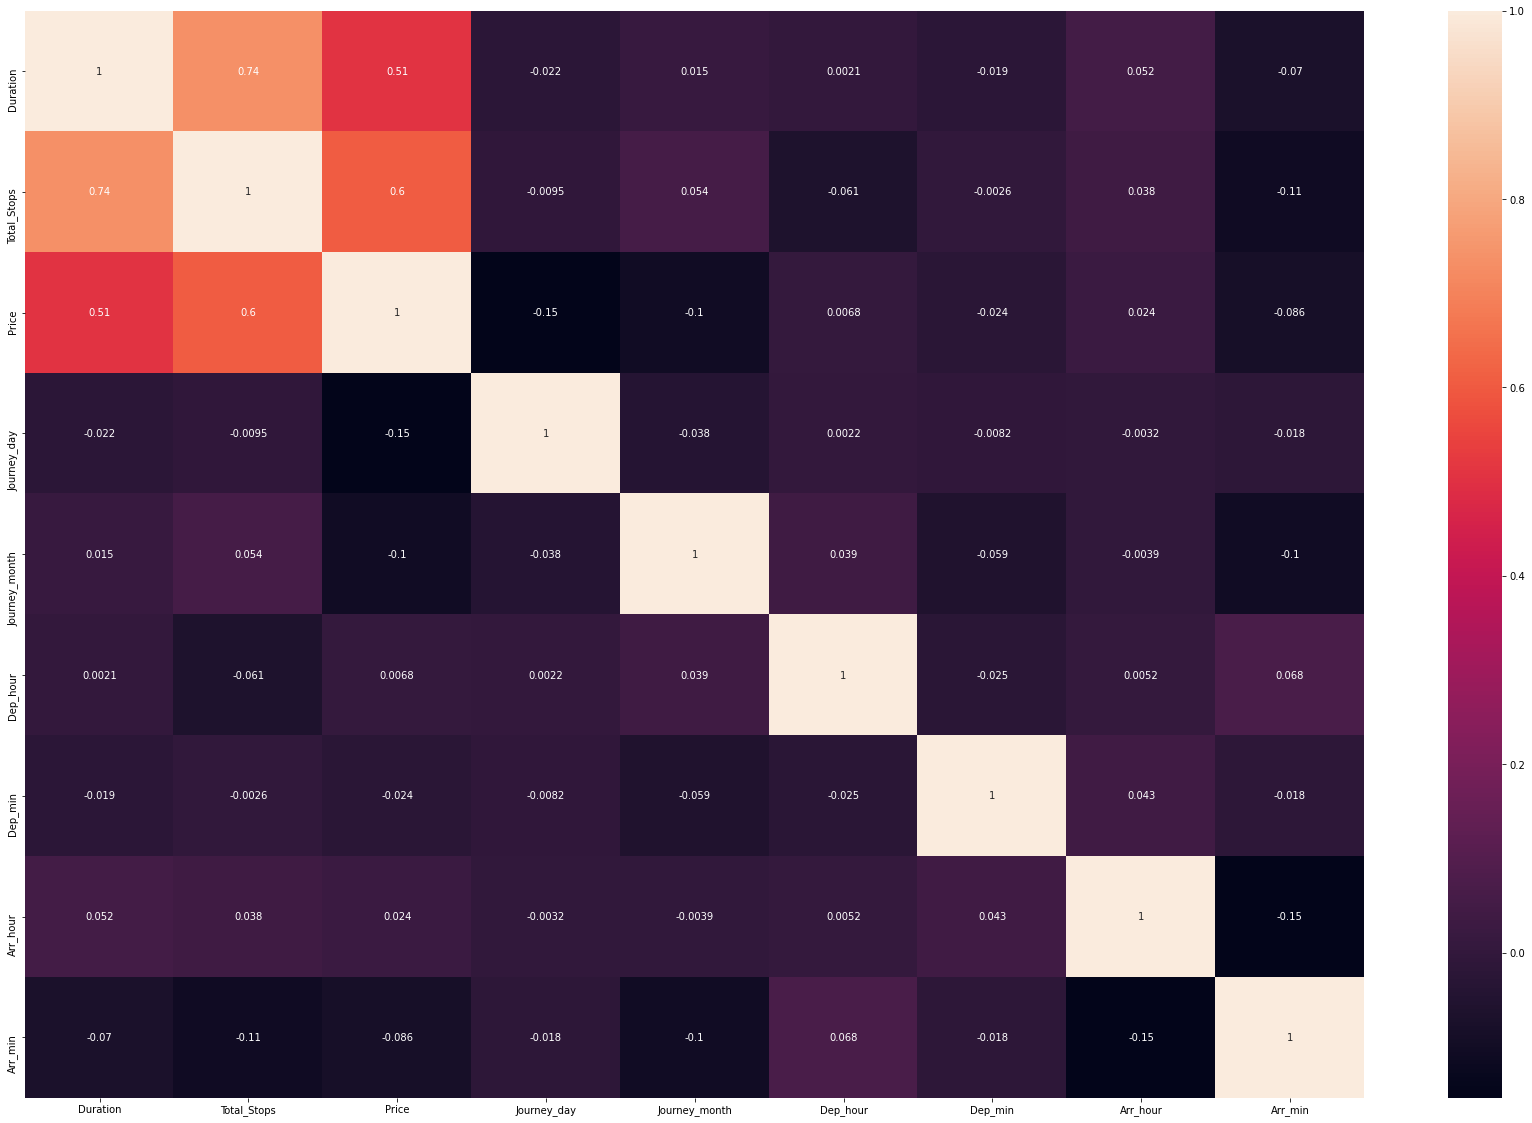

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)

## FEATURE ENGINEERING

## HANDLING CATEGORICAL FEATURES

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


In [ ]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
df['Airline'] = df['Airline'].str.replace('Vistara Premium economy', 'Vistara')
df['Airline'] = df['Airline'].str.replace('Jet Airways Business', 'Jet Airways')
df['Airline'] = df['Airline'].str.replace('Multiple carriers Premium economy', 'Other')
df['Airline'] = df['Airline'].str.replace('Multiple carriers', 'Other')
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


In [ ]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Other', 'GoAir',
       'Vistara', 'Air Asia', 'Trujet'], dtype=object)

In [ ]:
airline = pd.get_dummies(df['Airline'], drop_first=True)
source = pd.get_dummies(df['Source'], drop_first=True)
destination = pd.get_dummies(df['Destination'], drop_first=True)

In [ ]:
df = pd.concat([df, airline, source, destination], axis=1)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Air India,GoAir,IndiGo,Jet Airways,Other,SpiceJet,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# route is similar to stops. So we are going to drop the route column
df=df.drop(['Airline', 'Source', 'Destination', 'Route'], axis=1)
df.head()

,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Air India,GoAir,IndiGo,Jet Airways,Other,SpiceJet,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,170,0,No info,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2,No info,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2,No info,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,1,No info,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,1,No info,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [ ]:
df['Additional_Info'] = df['Additional_Info'].str.replace('1 Long layover', 'other')
df['Additional_Info'] = df['Additional_Info'].str.replace('Change airports', 'other')
df['Additional_Info'] = df['Additional_Info'].str.replace('Business class', 'other')
df['Additional_Info'] = df['Additional_Info'].str.replace('2 Long layover', 'other')
df['Additional_Info'] = df['Additional_Info'].str.replace('1 Short layover', 'other')
df['Additional_Info'] = df['Additional_Info'].str.replace('Red-eye flight', 'other')
df['Additional_Info'] = df['Additional_Info'].str.replace('No Info', 'No info')

In [ ]:
df.head()

,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Air India,GoAir,IndiGo,Jet Airways,Other,SpiceJet,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,170,0,No info,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2,No info,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2,No info,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,1,No info,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,1,No info,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', 'other'], dtype=object)

In [ ]:
addition = pd.get_dummies(df['Additional_Info'], drop_first=True)

In [ ]:
df = pd.concat([df, addition], axis=1)
df.head()

,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Air India,GoAir,IndiGo,Jet Airways,Other,SpiceJet,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,No check-in baggage included,No info,other
0,170,0,No info,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,445,2,No info,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1140,2,No info,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,325,1,No info,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,285,1,No info,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
df=df.drop(['Additional_Info'], axis=1)
df.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Air India,GoAir,IndiGo,Jet Airways,Other,SpiceJet,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,No check-in baggage included,No info,other
0,170,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,445,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1140,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,325,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,285,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## OUTLIER REMOVAL

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


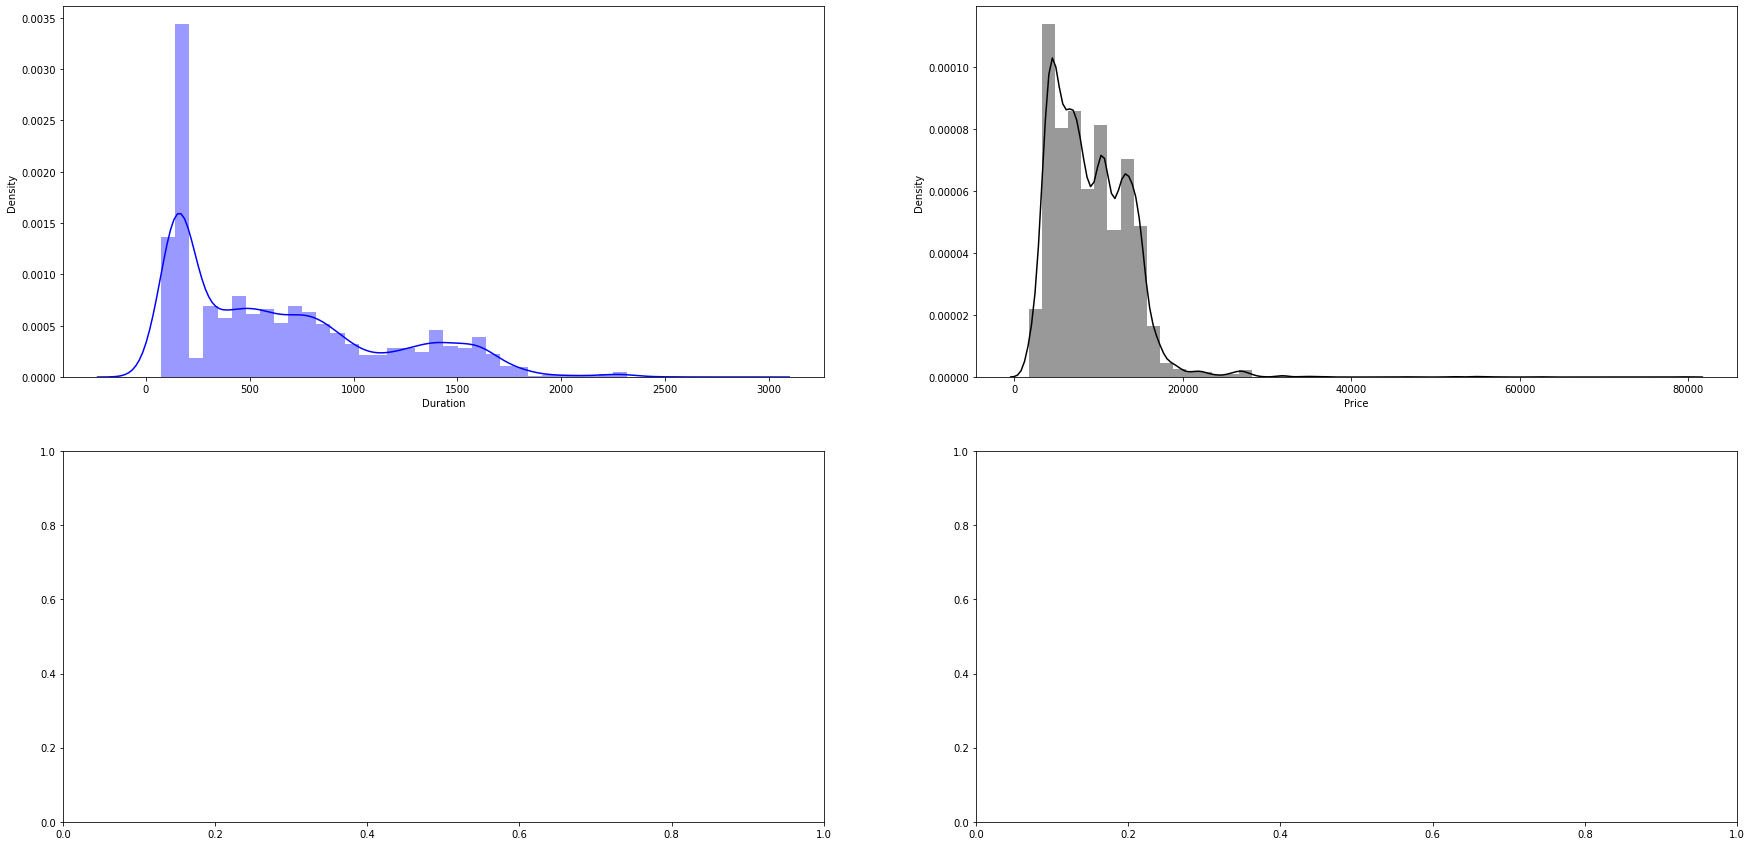

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.distplot(df["Duration"], kde =True, ax=ax[0,0], color = "blue")
sns.distplot(df["Price"], kde =True, ax=ax[0,1], color = "black")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


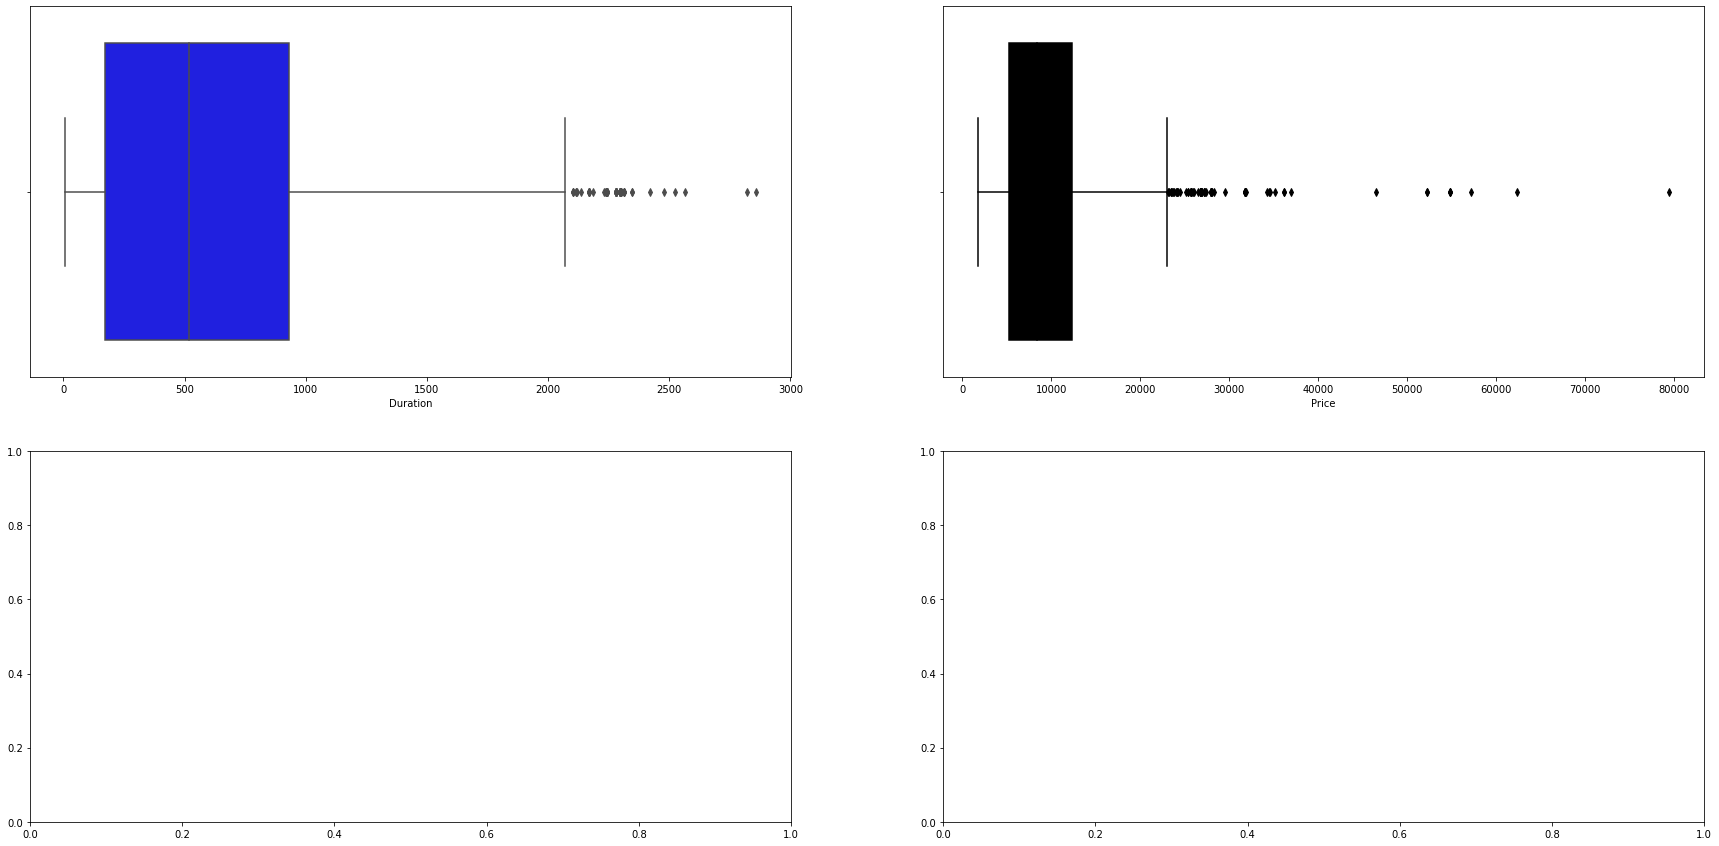

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.boxplot(df["Duration"], ax=ax[0,0], color = "blue")
sns.boxplot(df["Price"], ax=ax[0,1], color = "black")

In [ ]:
df[(df["Duration"]>2100)]

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Air India,GoAir,IndiGo,Jet Airways,Other,SpiceJet,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,No check-in baggage included,No info,other
226,2245,2,18799,3,3,5,25,18,50,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
553,2295,2,10598,9,3,5,0,19,15,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
919,2115,3,10991,12,5,12,0,23,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
925,2135,2,19907,6,3,16,50,4,25,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
966,2240,2,10493,21,5,5,55,19,15,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9848,2345,2,17135,1,3,8,50,23,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
10020,2295,2,9653,9,5,5,0,19,15,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
10326,2420,2,11791,3,3,5,50,22,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
10456,2860,2,20694,6,3,19,10,18,50,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
df[(df["Price"]>23000)]

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Air India,GoAir,IndiGo,Jet Airways,Other,SpiceJet,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,No check-in baggage included,No info,other
123,1215,1,27430,1,3,23,0,19,15,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
396,385,1,36983,1,3,12,50,19,15,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
486,380,1,26890,1,3,8,55,15,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
510,325,1,26890,1,3,7,0,12,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
597,1775,2,25139,6,3,9,40,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,1260,2,24210,6,3,19,50,16,50,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
10364,280,1,57209,1,3,9,45,14,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
10383,1325,1,26890,1,3,7,0,5,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
10439,860,1,31825,1,3,18,40,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
df = df.drop(df[(df["Price"]>23000)].index)
df.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Air India,GoAir,IndiGo,Jet Airways,Other,SpiceJet,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,No check-in baggage included,No info,other
0,170,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,445,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1140,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,325,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,285,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
df = df.drop(df[(df["Duration"]>2100)].index)
df.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Air India,GoAir,IndiGo,Jet Airways,Other,SpiceJet,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,No check-in baggage included,No info,other
0,170,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,445,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1140,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,325,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,285,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


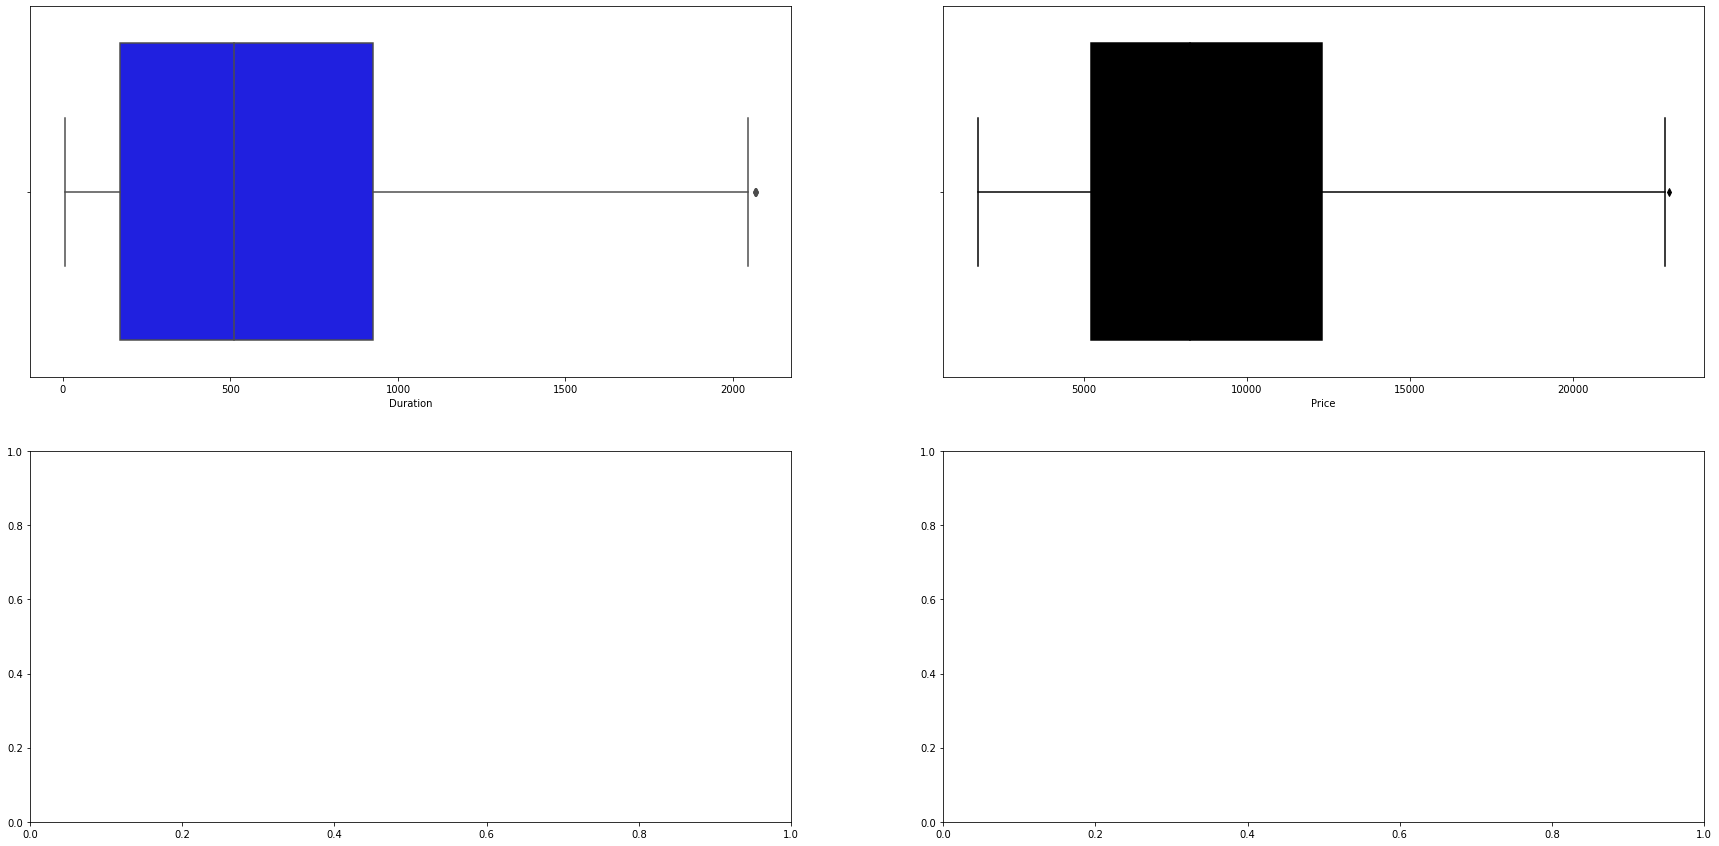

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.boxplot(df["Duration"], ax=ax[0,0], color = "blue")
sns.boxplot(df["Price"], ax=ax[0,1], color = "black")

In [ ]:
df.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Air India,GoAir,IndiGo,Jet Airways,Other,SpiceJet,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,No check-in baggage included,No info,other
0,170,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,445,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1140,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,325,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,285,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## TRAIN TEST SPLIT

In [ ]:
x=df.drop(['Price'], axis = 1)
y=df['Price']
x.shape, y.shape

((10515, 28), (10515,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state = 3)

## RANDOM FOREST REGRESSOR 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
clf.score(x_test, y_test)

0.9206412402478334

In [ ]:
clf.score(x_train, y_train)

0.9694162675922643

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 611.7508424078987
MSE: 1292380.4186928123
RMSE: 1136.829107074943


In [ ]:
y_act=clf.predict(x_train)

In [ ]:
def rmsle(y_pred,y_test) :
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    Acc = 1 - error
    return Acc

print("Accuracy attained on Training Set = ",rmsle(y_act, y_train))
print("Accuracy attained on Test Set = ",rmsle(y_pred,y_test))

Accuracy attained on Training Set =  0.9664627959402787
Accuracy attained on Test Set =  0.9439280912007623


## HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'n_estimators': [100, 200, 300, 500, 700, 900, 1000, 1200, 1300, 1500],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1, 3, 5, 8, 10, 12, 15, 18, 20, 24],
               'min_samples_split': [2, 4, 5, 6, 8, 10, 12, 15],
               'min_samples_leaf': [1, 2, 5, 10]}

In [ ]:
clf_r = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
clf_r.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3, total=   0.5s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3, total=   0.5s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3 
[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3, total=   0.5s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3 
[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3, total=   0.5s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3 
[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3, total=   0.5s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=100, min_samples_split=6, min_sa

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=20,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=2,
                                                   min_samples_split=5,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                               

In [ ]:
clf_r.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
clf_r.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}